In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('../Data/ecommerce_data.csv', encoding='latin1')

In [12]:
print("Rows, Columns: ", df.shape)
df.head()

Rows, Columns:  (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [13]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [14]:
df=df.dropna(subset=['Description'])
df=df.dropna(subset=['CustomerID'])
df=df.drop_duplicates()
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [15]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Number of unique customers: 4338
Number of unique products: 3665
Top 5 countries by number of transactions:
Country
United Kingdom    349203
Germany             9025
France              8326
EIRE                7226
Spain               2479
Name: count, dtype: int64
Total revenue: £8,887,208.89
Top 5 products by total sales:
Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
Name: TotalPrice, dtype: float64
Revenue of Top 5 Countries: Country
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Name: TotalPrice, dtype: float64


C:\Users\DDubr\AppData\Local\Temp\ipykernel_16412\4285508602.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum().plot(title='Monthly Sales')


<Axes: title={'center': 'Monthly Sales'}, xlabel='InvoiceDate'>

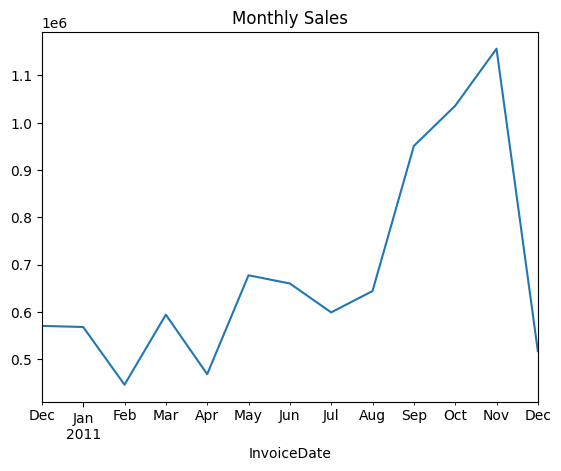

In [17]:
num_customers = df['CustomerID'].nunique()
print(f"Number of unique customers: {num_customers}")

num_products = df['StockCode'].nunique()
print(f"Number of unique products: {num_products}")


top_countries = df['Country'].value_counts().head(5)
print("Top 5 countries by number of transactions:")
print(top_countries)


total_revenue = df['TotalPrice'].sum()
print(f"Total revenue: £{total_revenue:,.2f}")

top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(5)
print("Top 5 products by total sales:")
print(top_products)

print("Revenue of Top 5 Countries:", df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5))

df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum().plot(title='Monthly Sales')
